In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r SouthAfrica_2018

In [5]:
SouthAfrica_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
16,16,HM Amla (SA),11,11,0,315,71,28.63,345,91.30,...,-,-,-,-,-,-,-,-,2,0
33,33,F Behardien (SA),1,1,0,1,1,1.00,5,20.00,...,-,-,-,-,-,-,-,-,0,0
71,71,CJ Dala (SA),2,2,1,8,5,8.00,6,133.33,...,121,1,1/57,121.00,7.11,102.0,0,0,1,0
76,76,Q de Kock (SA),10,10,0,327,87,32.70,359,91.08,...,-,-,-,-,-,-,-,-,24,1
80,80,AB de Villiers (SA),3,3,0,62,30,20.66,59,105.08,...,-,-,-,-,-,-,-,-,1,0
86,86,JP Duminy (SA),13,13,2,348,92,31.63,370,94.05,...,279,4,2/35,69.75,5.58,75.0,0,0,1,0
87,87,F du Plessis (SA),8,8,1,434,125,62.00,451,96.23,...,-,-,-,-,-,-,-,-,5,0
88,88,SA Edwards (NED),2,2,0,27,18,13.50,34,79.41,...,-,-,-,-,-,-,-,-,4,0
91,91,D Elgar (SA),2,2,0,6,4,3.00,17,35.29,...,-,-,-,-,-,-,-,-,1,0
115,115,RR Hendricks (SA),9,9,0,244,102,27.11,311,78.45,...,-,-,-,-,-,-,-,-,8,0


In [6]:
SouthAfrica_2018=SouthAfrica_2018.reset_index()

In [7]:
SouthAfrica_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,16,16,HM Amla (SA),11,11,0,315,71,28.63,345,...,-,-,-,-,-,-,-,-,2,0
1,33,33,F Behardien (SA),1,1,0,1,1,1.00,5,...,-,-,-,-,-,-,-,-,0,0
2,71,71,CJ Dala (SA),2,2,1,8,5,8.00,6,...,121,1,1/57,121.00,7.11,102.0,0,0,1,0
3,76,76,Q de Kock (SA),10,10,0,327,87,32.70,359,...,-,-,-,-,-,-,-,-,24,1
4,80,80,AB de Villiers (SA),3,3,0,62,30,20.66,59,...,-,-,-,-,-,-,-,-,1,0
5,86,86,JP Duminy (SA),13,13,2,348,92,31.63,370,...,279,4,2/35,69.75,5.58,75.0,0,0,1,0
6,87,87,F du Plessis (SA),8,8,1,434,125,62.00,451,...,-,-,-,-,-,-,-,-,5,0
7,88,88,SA Edwards (NED),2,2,0,27,18,13.50,34,...,-,-,-,-,-,-,-,-,4,0
8,91,91,D Elgar (SA),2,2,0,6,4,3.00,17,...,-,-,-,-,-,-,-,-,1,0
9,115,115,RR Hendricks (SA),9,9,0,244,102,27.11,311,...,-,-,-,-,-,-,-,-,8,0


In [8]:
SouthAfrica_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
SouthAfrica_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,HM Amla (SA),11,11,0,315,71,28.63,345,91.30,0,...,-,-,-,-,-,-,-,-,2,0
1,F Behardien (SA),1,1,0,1,1,1.00,5,20.00,0,...,-,-,-,-,-,-,-,-,0,0
2,CJ Dala (SA),2,2,1,8,5,8.00,6,133.33,0,...,121,1,1/57,121.00,7.11,102.0,0,0,1,0
3,Q de Kock (SA),10,10,0,327,87,32.70,359,91.08,0,...,-,-,-,-,-,-,-,-,24,1
4,AB de Villiers (SA),3,3,0,62,30,20.66,59,105.08,0,...,-,-,-,-,-,-,-,-,1,0
5,JP Duminy (SA),13,13,2,348,92,31.63,370,94.05,0,...,279,4,2/35,69.75,5.58,75.0,0,0,1,0
6,F du Plessis (SA),8,8,1,434,125,62.00,451,96.23,2,...,-,-,-,-,-,-,-,-,5,0
7,SA Edwards (NED),2,2,0,27,18,13.50,34,79.41,0,...,-,-,-,-,-,-,-,-,4,0
8,D Elgar (SA),2,2,0,6,4,3.00,17,35.29,0,...,-,-,-,-,-,-,-,-,1,0
9,RR Hendricks (SA),9,9,0,244,102,27.11,311,78.45,1,...,-,-,-,-,-,-,-,-,8,0


In [10]:
SouthAfrica_2018_players =SouthAfrica_2018.copy()

In [11]:
SouthAfrica_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
SouthAfrica_2018_players.HS=SouthAfrica_2018_players.HS.str.extract('(\d+)')
SouthAfrica_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
SouthAfrica_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,11,11,0,315,71,28.63,345,91.30,0,2,...,-,-,-,-,-,-,-,-,2,0
1,1,1,0,1,1,1.00,5,20.00,0,0,...,-,-,-,-,-,-,-,-,0,0
2,2,2,1,8,5,8.00,6,133.33,0,0,...,121,1,1/57,121.00,7.11,102.0,0,0,1,0
3,10,10,0,327,87,32.70,359,91.08,0,2,...,-,-,-,-,-,-,-,-,24,1
4,3,3,0,62,30,20.66,59,105.08,0,0,...,-,-,-,-,-,-,-,-,1,0
5,13,13,2,348,92,31.63,370,94.05,0,3,...,279,4,2/35,69.75,5.58,75.0,0,0,1,0
6,8,8,1,434,125,62.00,451,96.23,2,0,...,-,-,-,-,-,-,-,-,5,0
7,2,2,0,27,18,13.50,34,79.41,0,0,...,-,-,-,-,-,-,-,-,4,0
8,2,2,0,6,4,3.00,17,35.29,0,0,...,-,-,-,-,-,-,-,-,1,0
9,9,9,0,244,102,27.11,311,78.45,1,1,...,-,-,-,-,-,-,-,-,8,0


In [14]:
SouthAfrica_2018_players.replace("-",0,inplace=True)

In [15]:
SouthAfrica_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

SouthAfrica_2018_players_scaled = pd.DataFrame(scaler.fit_transform(SouthAfrica_2018_players),columns=SouthAfrica_2018_players.columns)
SouthAfrica_2018_players_scaled.shape
SouthAfrica_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.817787,1.188860,-0.807862,1.298258,0.751677,0.580723,1.260577,0.535463,-0.338062,1.778247,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.335133,-0.272727
1,-1.374219,-1.226012,-0.807862,-0.926549,-1.074828,-1.435223,-0.969907,-2.067026,-0.338062,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.713979,-0.272727
2,-1.155019,-0.984525,-0.029921,-0.876951,-0.970457,-0.924487,-0.963347,2.069581,-0.338062,-0.592749,...,-0.499675,-0.129586,-0.490793,2.704388,1.454347,2.138683,-0.345857,-0.2,-0.524556,-0.272727
3,0.598586,0.947373,-0.807862,1.383283,1.169164,0.877679,1.352420,0.527433,-0.338062,1.778247,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,3.832175,2.090909
4,-0.935818,-0.743038,-0.807862,-0.494341,-0.318133,-0.000786,-0.615654,1.038441,-0.338062,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.524556,-0.272727


In [17]:
SouthAfrica_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,-2.562053e-17,8.326673e-17,-6.058188e-17,-6.405133e-18,-4.910602e-17,-3.416071e-17,8.540177e-17,-2.967712e-16,2.135044e-17,-8.540177e-18,...,-9.607699e-17,-5.978124e-17,2.562053e-17,-1.152924e-16,7.686159e-17,-1.238326e-16,-9.821204e-17,-2.135044e-18,3.843080e-17,-2.135044e-17
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,...,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.374219e+00,-1.226012e+00,-8.078620e-01,-9.336339e-01,-1.100921e+00,-1.508185e+00,-9.895882e-01,-2.797037e+00,-3.380617e-01,-5.927490e-01,...,-4.996751e-01,-7.616449e-01,-6.237167e-01,-7.084107e-01,-1.041944e+00,-7.586337e-01,-3.458572e-01,-2.000000e-01,-7.139793e-01,-2.727273e-01
25%,-1.100218e+00,-9.845248e-01,-8.078620e-01,-7.724417e-01,-7.160505e-01,-7.603222e-01,-7.862205e-01,-4.442117e-01,-3.380617e-01,-5.927490e-01,...,-4.996751e-01,-7.616449e-01,-6.237167e-01,-7.084107e-01,-1.041944e+00,-7.586337e-01,-3.458572e-01,-2.000000e-01,-5.245562e-01,-2.727273e-01
50%,-2.782161e-01,-2.600632e-01,-2.992081e-02,-5.191397e-01,-3.833655e-01,-8.578670e-02,-5.566118e-01,2.033081e-01,-3.380617e-01,-5.927490e-01,...,-4.996751e-01,-4.821809e-01,-5.572551e-01,-5.415784e-01,3.519061e-01,-4.575400e-01,-3.458572e-01,-2.000000e-01,-4.298447e-01,-2.727273e-01
75%,9.821873e-01,8.870012e-01,-2.992081e-02,8.323949e-01,4.581318e-01,7.448879e-01,1.003087e+00,6.347446e-01,-3.380617e-01,5.927490e-01,...,-8.059276e-02,3.849411e-01,1.405919e-01,2.388525e-01,8.978601e-01,2.703397e-01,-3.458572e-01,-2.000000e-01,1.857803e-01,-2.727273e-01
max,1.694589e+00,2.154809e+00,3.081844e+00,2.141417e+00,2.525997e+00,3.015471e+00,1.955963e+00,2.069581e+00,4.056740e+00,2.963745e+00,...,3.272066e+00,2.382978e+00,2.832287e+00,2.704388e+00,1.626384e+00,2.479543e+00,3.251058e+00,5.000000e+00,3.832175e+00,4.454545e+00


In [18]:
X =  SouthAfrica_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 8.17786844e-01,  1.18886019e+00, -8.07861995e-01,
         1.29825806e+00,  7.51677357e-01,  5.80722954e-01,
         1.26057688e+00,  5.35463084e-01, -3.38061702e-01,
         1.77824694e+00,  1.28571429e+00,  1.76946357e+00,
        -5.01727663e-01, -1.67157539e+00,  8.17786844e-01,
        -7.88901951e-01, -7.58333389e-01, -4.99675135e-01,
        -7.61644927e-01, -6.23716665e-01, -7.08410666e-01,
        -1.04194439e+00, -7.58633665e-01, -3.45857232e-01,
        -2.00000000e-01, -3.35133145e-01, -2.72727273e-01],
       [-1.37421913e+00, -1.22601207e+00, -8.07861995e-01,
        -9.26548572e-01, -1.07482837e+00, -1.43522252e+00,
        -9.69907432e-01, -2.06702620e+00, -3.38061702e-01,
        -5.92748978e-01, -5.71428571e-01, -8.74562453e-01,
        -8.27850645e-01, -1.47544151e+00, -1.37421913e+00,
        -7.88901951e-01, -7.58333389e-01, -4.99675135e-01,
        -7.61644927e-01, -6.23716665e-01, -7.08410666e-01,
        -1.04194439e+00, -7.58633665e-01, -3.45857232e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(SouthAfrica_2018_players_scaled))

False

In [23]:
SouthAfrica_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.817787,1.188860,-0.807862,1.298258,0.751677,0.580723,1.260577,0.535463,-0.338062,1.778247,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.335133,-0.272727
1,-1.374219,-1.226012,-0.807862,-0.926549,-1.074828,-1.435223,-0.969907,-2.067026,-0.338062,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.713979,-0.272727
2,-1.155019,-0.984525,-0.029921,-0.876951,-0.970457,-0.924487,-0.963347,2.069581,-0.338062,-0.592749,...,-0.499675,-0.129586,-0.490793,2.704388,1.454347,2.138683,-0.345857,-0.2,-0.524556,-0.272727
3,0.598586,0.947373,-0.807862,1.383283,1.169164,0.877679,1.352420,0.527433,-0.338062,1.778247,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,3.832175,2.090909
4,-0.935818,-0.743038,-0.807862,-0.494341,-0.318133,-0.000786,-0.615654,1.038441,-0.338062,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.524556,-0.272727
5,1.256188,1.671835,0.748020,1.532075,1.299629,0.799610,1.424583,0.635840,-0.338062,2.963745,...,-0.080593,0.695747,-0.092024,1.258884,0.917170,1.371746,-0.345857,-0.2,-0.524556,-0.272727
6,0.160185,0.464399,-0.029921,2.141417,2.160696,3.015471,1.955963,0.715411,4.056740,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,0.233136,-0.272727
7,-1.155019,-0.984525,-0.807862,-0.742329,-0.631248,-0.523195,-0.779660,0.101472,-0.338062,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,0.043713,-0.272727
8,-1.155019,-0.984525,-0.807862,-0.891122,-0.996550,-1.289298,-0.891184,-1.508933,-0.338062,-0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.524556,-0.272727
9,0.379386,0.705886,-0.807862,0.795197,1.560558,0.469820,1.037528,0.066431,1.859339,0.592749,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,0.801405,-0.272727


In [24]:
np.all(np.isfinite(SouthAfrica_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


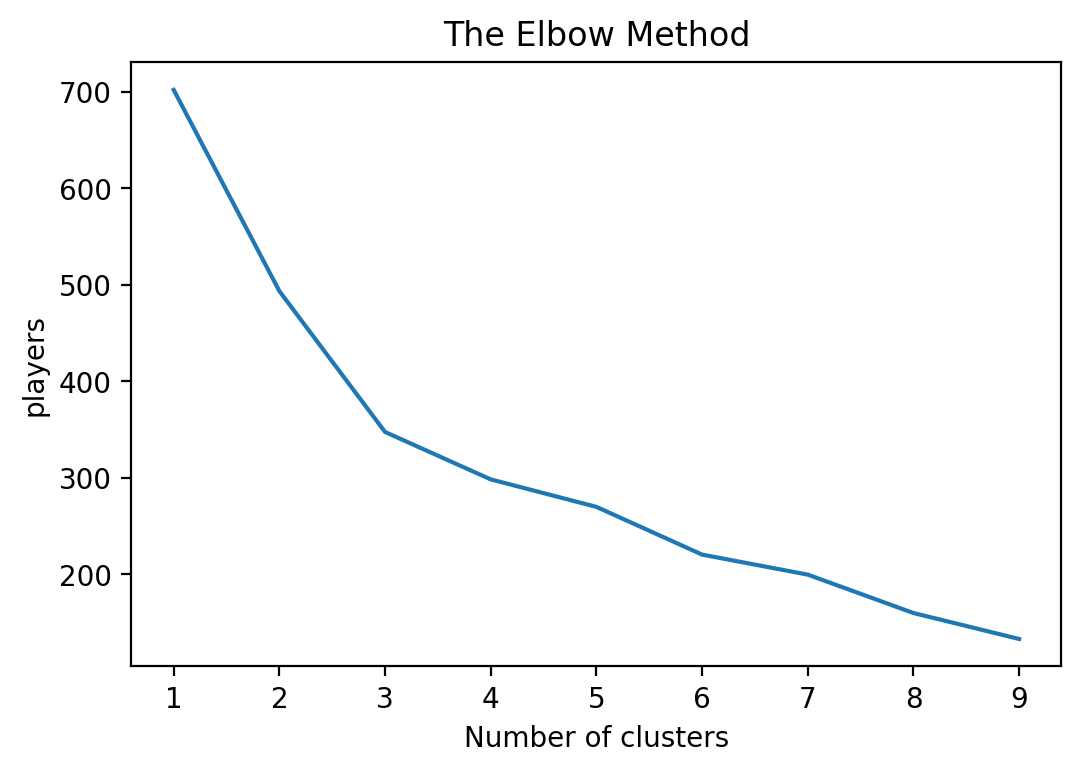

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[ 1.20138789,  0.22291129,  1.52596155, -0.48725554, -0.60515547,
        -0.20270862, -0.44016741, -0.27275037, -0.3380617 , -0.59274898,
         0.82142857, -0.52753404, -0.01254319,  0.555121  ,  1.20138789,
         1.9352751 ,  2.02264936,  2.01481909,  2.02646572,  2.10120942,
         0.04388581,  0.8320296 ,  0.09848909,  1.45260037,  1.1       ,
         0.04371302, -0.27272727],
       [-0.84187482, -0.77753579, -0.30775695, -0.66540202, -0.53433178,
        -0.46029123, -0.67047897, -0.2007791 , -0.3380617 , -0.42339213,
        -0.43877551, -0.64793165, -0.57161116,  0.18263145, -0.84187482,
        -0.28527258, -0.25360128, -0.3200684 , -0.26204236, -0.28191409,
         0.25174621,  0.02714241,  0.25319523, -0.21739597, -0.2       ,
        -0.49749579, -0.27272727],
       [ 0.87258699,  1.24923199, -0.22440611,  1.40808131,  1.23765835,
         0.90686397,  1.3934219 ,  0.48773861,  0.76063883,  1.03731071,
         0.35714286,  1.39764741,  1.00659112, -0.5971

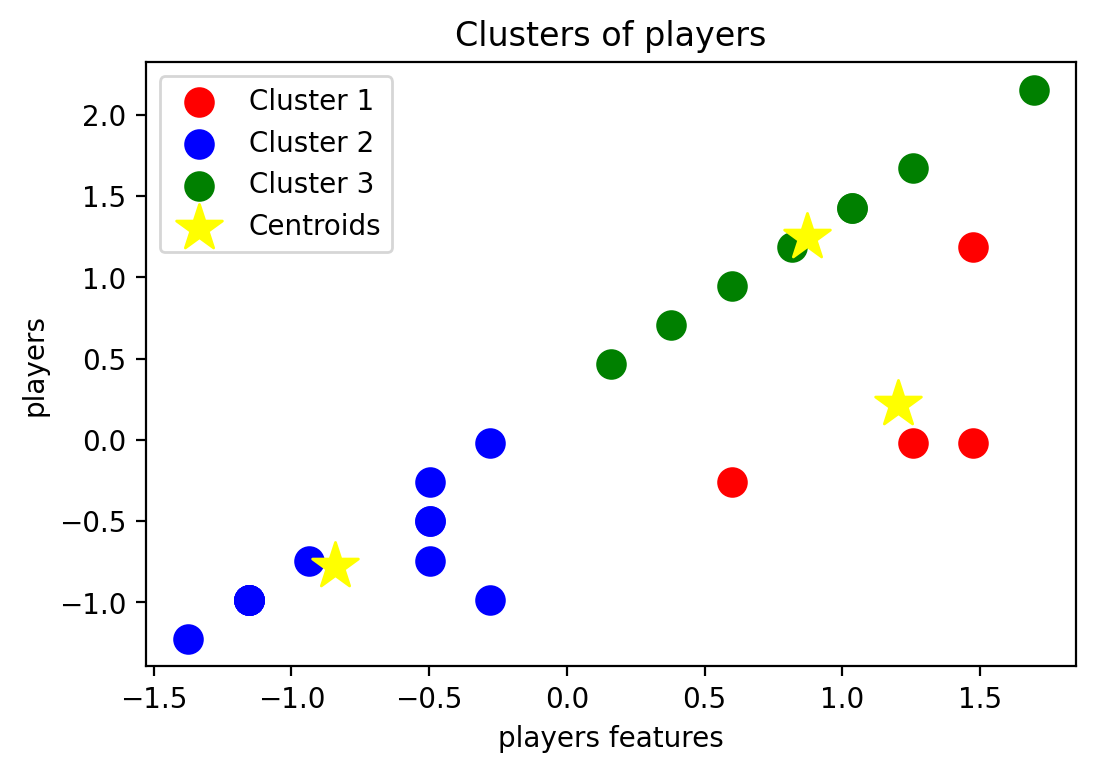

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
SouthAfrica_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,HM Amla (SA),11,11,0,315,71,28.63,345,91.30,0,...,-,-,-,-,-,-,-,-,2,0
1,F Behardien (SA),1,1,0,1,1,1.00,5,20.00,0,...,-,-,-,-,-,-,-,-,0,0
2,CJ Dala (SA),2,2,1,8,5,8.00,6,133.33,0,...,121,1,1/57,121.00,7.11,102.0,0,0,1,0
3,Q de Kock (SA),10,10,0,327,87,32.70,359,91.08,0,...,-,-,-,-,-,-,-,-,24,1
4,AB de Villiers (SA),3,3,0,62,30,20.66,59,105.08,0,...,-,-,-,-,-,-,-,-,1,0
5,JP Duminy (SA),13,13,2,348,92,31.63,370,94.05,0,...,279,4,2/35,69.75,5.58,75.0,0,0,1,0
6,F du Plessis (SA),8,8,1,434,125,62.00,451,96.23,2,...,-,-,-,-,-,-,-,-,5,0
7,SA Edwards (NED),2,2,0,27,18,13.50,34,79.41,0,...,-,-,-,-,-,-,-,-,4,0
8,D Elgar (SA),2,2,0,6,4,3.00,17,35.29,0,...,-,-,-,-,-,-,-,-,1,0
9,RR Hendricks (SA),9,9,0,244,102,27.11,311,78.45,1,...,-,-,-,-,-,-,-,-,8,0


In [31]:
SouthAfrica_2018["cluster"] = y_kmeans

In [32]:
SouthAfrica_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,HM Amla (SA),11,11,0,315,71,28.63,345,91.30,0,...,-,-,-,-,-,-,-,2,0,2
1,F Behardien (SA),1,1,0,1,1,1.00,5,20.00,0,...,-,-,-,-,-,-,-,0,0,1
2,CJ Dala (SA),2,2,1,8,5,8.00,6,133.33,0,...,1,1/57,121.00,7.11,102.0,0,0,1,0,1
3,Q de Kock (SA),10,10,0,327,87,32.70,359,91.08,0,...,-,-,-,-,-,-,-,24,1,2
4,AB de Villiers (SA),3,3,0,62,30,20.66,59,105.08,0,...,-,-,-,-,-,-,-,1,0,1
5,JP Duminy (SA),13,13,2,348,92,31.63,370,94.05,0,...,4,2/35,69.75,5.58,75.0,0,0,1,0,2
6,F du Plessis (SA),8,8,1,434,125,62.00,451,96.23,2,...,-,-,-,-,-,-,-,5,0,2
7,SA Edwards (NED),2,2,0,27,18,13.50,34,79.41,0,...,-,-,-,-,-,-,-,4,0,1
8,D Elgar (SA),2,2,0,6,4,3.00,17,35.29,0,...,-,-,-,-,-,-,-,1,0,1
9,RR Hendricks (SA),9,9,0,244,102,27.11,311,78.45,1,...,-,-,-,-,-,-,-,8,0,2


In [33]:
SouthAfrica_2018['cluster'].value_counts()

1    14
2     8
0     4
Name: cluster, dtype: int64

In [34]:
SouthAfrica_Cluster_2018 = np.array([4,14,8])

In [35]:
SouthAfrica_Cluster_2018

array([ 4, 14,  8])

In [36]:
%store SouthAfrica_Cluster_2018

Stored 'SouthAfrica_Cluster_2018' (ndarray)


In [37]:
SouthAfrica_2018_players_scaled.insert(0, 'Player', SouthAfrica_2018.Player)

In [38]:
SouthAfrica_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,HM Amla (SA),0.817787,1.188860,-0.807862,1.298258,0.751677,0.580723,1.260577,0.535463,-0.338062,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.335133,-0.272727
1,F Behardien (SA),-1.374219,-1.226012,-0.807862,-0.926549,-1.074828,-1.435223,-0.969907,-2.067026,-0.338062,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.713979,-0.272727
2,CJ Dala (SA),-1.155019,-0.984525,-0.029921,-0.876951,-0.970457,-0.924487,-0.963347,2.069581,-0.338062,...,-0.499675,-0.129586,-0.490793,2.704388,1.454347,2.138683,-0.345857,-0.2,-0.524556,-0.272727
3,Q de Kock (SA),0.598586,0.947373,-0.807862,1.383283,1.169164,0.877679,1.352420,0.527433,-0.338062,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,3.832175,2.090909
4,AB de Villiers (SA),-0.935818,-0.743038,-0.807862,-0.494341,-0.318133,-0.000786,-0.615654,1.038441,-0.338062,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.524556,-0.272727
5,JP Duminy (SA),1.256188,1.671835,0.748020,1.532075,1.299629,0.799610,1.424583,0.635840,-0.338062,...,-0.080593,0.695747,-0.092024,1.258884,0.917170,1.371746,-0.345857,-0.2,-0.524556,-0.272727
6,F du Plessis (SA),0.160185,0.464399,-0.029921,2.141417,2.160696,3.015471,1.955963,0.715411,4.056740,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,0.233136,-0.272727
7,SA Edwards (NED),-1.155019,-0.984525,-0.807862,-0.742329,-0.631248,-0.523195,-0.779660,0.101472,-0.338062,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,0.043713,-0.272727
8,D Elgar (SA),-1.155019,-0.984525,-0.807862,-0.891122,-0.996550,-1.289298,-0.891184,-1.508933,-0.338062,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,-0.524556,-0.272727
9,RR Hendricks (SA),0.379386,0.705886,-0.807862,0.795197,1.560558,0.469820,1.037528,0.066431,1.859339,...,-0.499675,-0.761645,-0.623717,-0.708411,-1.041944,-0.758634,-0.345857,-0.2,0.801405,-0.272727


In [39]:
SouthAfrica_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,HM Amla (SA),0.580723,-0.708411
1,F Behardien (SA),-1.435223,-0.708411
2,CJ Dala (SA),-0.924487,2.704388
3,Q de Kock (SA),0.877679,-0.708411
4,AB de Villiers (SA),-0.000786,-0.708411
5,JP Duminy (SA),0.799610,1.258884
6,F du Plessis (SA),3.015471,-0.708411
7,SA Edwards (NED),-0.523195,-0.708411
8,D Elgar (SA),-1.289298,-0.708411
9,RR Hendricks (SA),0.469820,-0.708411


In [40]:
SouthAfrica_2018_Ave=SouthAfrica_2018_players_scaled.mean()

In [41]:
SouthAfrica_2018_Ave

Mat_x          -2.562053e-17
Inns_x          8.326673e-17
NO             -6.058188e-17
Runs_x         -6.405133e-18
HS             -4.910602e-17
Ave_x          -3.416071e-17
BF              8.540177e-17
SR_x           -2.967712e-16
100             2.135044e-17
50             -8.540177e-18
0              -5.978124e-17
4s              1.067522e-17
6s              5.017354e-17
Unnamed: 0_y    3.416071e-17
Mat_y          -2.562053e-17
Inns_y         -1.494531e-16
Overs          -2.989062e-17
Mdns           -9.607699e-17
Runs_y         -5.978124e-17
Wkts            2.562053e-17
Ave_y          -1.152924e-16
Econ            7.686159e-17
SR_y           -1.238326e-16
4              -9.821204e-17
5              -2.135044e-18
Ct              3.843080e-17
St             -2.135044e-17
dtype: float64

In [42]:
SouthAfrica_Ave_2018 =SouthAfrica_2018_Ave[['Ave_x','Ave_y']]

In [43]:
SouthAfrica_Ave_2018

Ave_x   -3.416071e-17
Ave_y   -1.152924e-16
dtype: float64

In [44]:
SouthAfrica_Ave_2018 = np.array([SouthAfrica_Ave_2018.Ave_x, SouthAfrica_Ave_2018.Ave_y])

In [45]:
SouthAfrica_Ave_2018

array([-3.41607085e-17, -1.15292391e-16])

In [46]:
%store SouthAfrica_Ave_2018

Stored 'SouthAfrica_Ave_2018' (ndarray)


In [47]:
SouthAfrica_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,HM Amla (SA),11,11,0,315,71,28.63,345,91.30,0,...,-,-,-,-,-,-,-,2,0,2
1,F Behardien (SA),1,1,0,1,1,1.00,5,20.00,0,...,-,-,-,-,-,-,-,0,0,1
2,CJ Dala (SA),2,2,1,8,5,8.00,6,133.33,0,...,1,1/57,121.00,7.11,102.0,0,0,1,0,1
3,Q de Kock (SA),10,10,0,327,87,32.70,359,91.08,0,...,-,-,-,-,-,-,-,24,1,2
4,AB de Villiers (SA),3,3,0,62,30,20.66,59,105.08,0,...,-,-,-,-,-,-,-,1,0,1
5,JP Duminy (SA),13,13,2,348,92,31.63,370,94.05,0,...,4,2/35,69.75,5.58,75.0,0,0,1,0,2
6,F du Plessis (SA),8,8,1,434,125,62.00,451,96.23,2,...,-,-,-,-,-,-,-,5,0,2
7,SA Edwards (NED),2,2,0,27,18,13.50,34,79.41,0,...,-,-,-,-,-,-,-,4,0,1
8,D Elgar (SA),2,2,0,6,4,3.00,17,35.29,0,...,-,-,-,-,-,-,-,1,0,1
9,RR Hendricks (SA),9,9,0,244,102,27.11,311,78.45,1,...,-,-,-,-,-,-,-,8,0,2
